Iteration 10: Best path length = 3000
Iteration 20: Best path length = 3000
Iteration 30: Best path length = 3000
Iteration 40: Best path length = 3000
Iteration 50: Best path length = 3000
Iteration 60: Best path length = 3000
Iteration 70: Best path length = 3000
Iteration 80: Best path length = 3000
Iteration 90: Best path length = 3000
Iteration 100: Best path length = 3000

Final Results:
Best path length: 3000
Best path: Ankara -> İstanbul -> Sivas -> Adana -> Kars -> Ankara


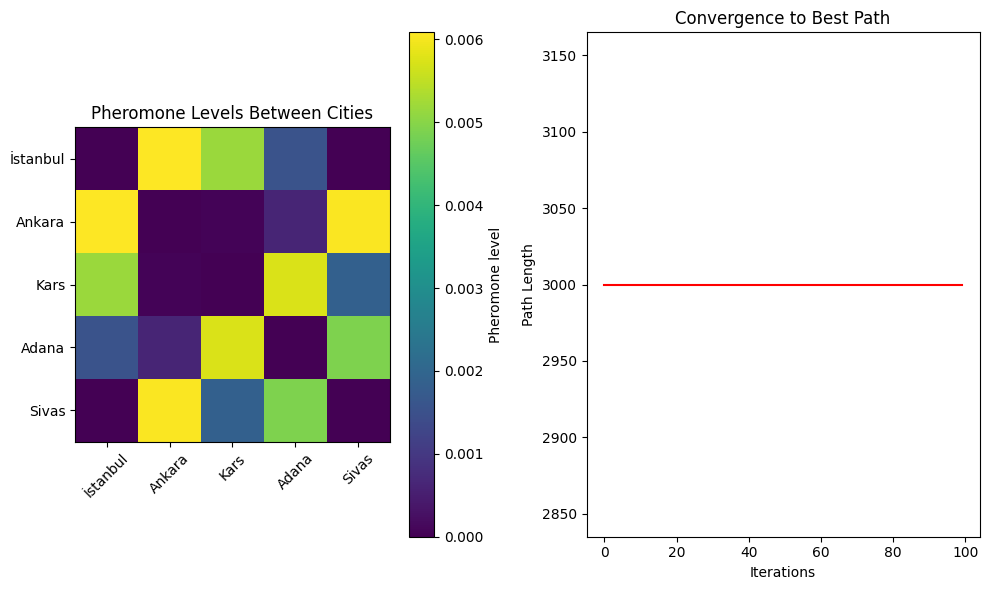

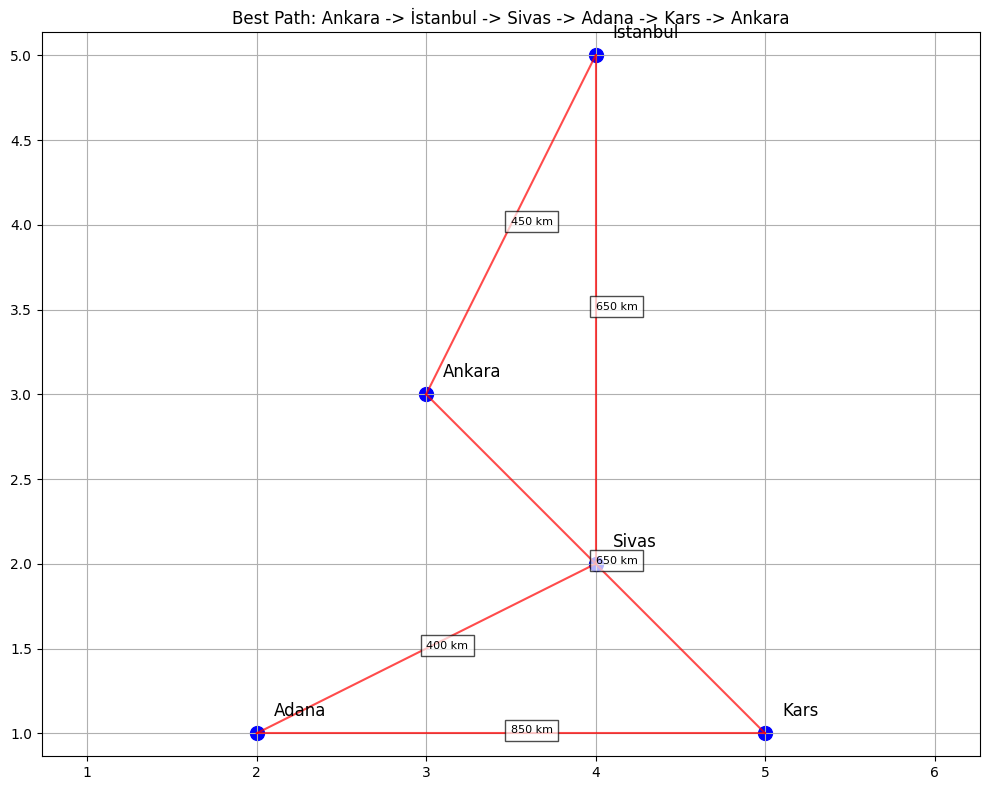

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the problem
cities = ['İstanbul', 'Ankara', 'Kars', 'Adana', 'Sivas']
distance_matrix = np.array([
    [0, 450, 1100, 900, 650],
    [450, 0, 650, 550, 300],
    [1100, 650, 0, 850, 600],
    [900, 550, 850, 0, 400],
    [650, 300, 600, 400, 0]
])

# ACO parameters
n_ants = 10
n_iterations = 100
decay = 0.5  # pheromone decay rate
alpha = 1.0  # pheromone importance
beta = 2.0   # distance importance

n_cities = len(cities)

# Initialize pheromone matrix
pheromone = np.ones((n_cities, n_cities))
best_path = None
best_path_length = float('inf')

# Function to calculate path length
def calculate_path_length(path, distance_matrix):
    length = 0
    for i in range(len(path) - 1):
        length += distance_matrix[path[i]][path[i+1]]
    # Add return to start
    length += distance_matrix[path[-1]][path[0]]
    return length

# Main ACO algorithm
for iteration in range(n_iterations):
    all_paths = []
    all_path_lengths = []

    # Each ant constructs a path
    for ant in range(n_ants):
        # Start from a random city
        current_city = random.randint(0, n_cities-1)
        path = [current_city]
        unvisited = list(range(n_cities))
        unvisited.remove(current_city)

        # Construct path by visiting each city
        while unvisited:
            # Calculate probabilities for each unvisited city
            probabilities = []
            total = 0

            for city in unvisited:
                # Calculate the attractiveness
                pheromone_amount = pheromone[current_city][city] ** alpha
                distance = 1.0 / ((distance_matrix[current_city][city]) ** beta)
                probability = pheromone_amount * distance
                probabilities.append(probability)
                total += probability

            # Normalize probabilities
            probabilities = [p/total for p in probabilities]

            # Select next city based on probabilities
            cumulative_prob = 0
            r = random.random()

            for i, city in enumerate(unvisited):
                cumulative_prob += probabilities[i]
                if r <= cumulative_prob:
                    next_city = city
                    break

            # Move to the next city
            path.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city

        # Calculate path length
        path_length = calculate_path_length(path, distance_matrix)
        all_paths.append(path)
        all_path_lengths.append(path_length)

        # Update best path if better is found
        if path_length < best_path_length:
            best_path = path
            best_path_length = path_length

    # Update pheromones with decay
    pheromone = pheromone * decay

    # Add new pheromones based on path quality
    for path, path_length in zip(all_paths, all_path_lengths):
        # Amount of pheromone to add is inversely proportional to path length
        amount = 1.0 / path_length

        for i in range(len(path) - 1):
            pheromone[path[i]][path[i+1]] += amount
            pheromone[path[i+1]][path[i]] += amount  # Symmetric

        # Connect last city to first city
        pheromone[path[-1]][path[0]] += amount
        pheromone[path[0]][path[-1]] += amount

    # Print progress every 10 iterations
    if (iteration + 1) % 10 == 0:
        print(f"Iteration {iteration + 1}: Best path length = {best_path_length}")

# Print final results
print("\nFinal Results:")
print(f"Best path length: {best_path_length}")
best_path_names = [cities[i] for i in best_path]
best_path_names.append(cities[best_path[0]])  # Return to start
print(f"Best path: {' -> '.join(best_path_names)}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot pheromone levels
plt.subplot(1, 2, 1)
plt.imshow(pheromone, cmap='viridis')
plt.colorbar(label='Pheromone level')
plt.title('Pheromone Levels Between Cities')
plt.xticks(range(n_cities), cities, rotation=45)
plt.yticks(range(n_cities), cities)

# Plot convergence
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), [best_path_length] * n_iterations, 'r-')
plt.xlabel('Iterations')
plt.ylabel('Path Length')
plt.title('Convergence to Best Path')

plt.tight_layout()
plt.show()

# Create a more detailed visualization of the best path
def plot_best_path():
    # For visualization purposes, we'll create arbitrary coordinates
    # In a real scenario, you would use actual geographic coordinates
    coordinates = {
        'İstanbul': (4, 5),
        'Ankara': (3, 3),
        'Kars': (5, 1),
        'Adana': (2, 1),
        'Sivas': (4, 2)
    }

    plt.figure(figsize=(10, 8))

    # Plot cities
    x = [coordinates[city][0] for city in cities]
    y = [coordinates[city][1] for city in cities]
    plt.scatter(x, y, s=100, c='blue')

    # Label cities
    for city, (x_pos, y_pos) in coordinates.items():
        plt.text(x_pos + 0.1, y_pos + 0.1, city, fontsize=12)

    # Plot the best path
    for i in range(len(best_path)):
        start_city = cities[best_path[i]]
        end_city = cities[best_path[(i + 1) % len(best_path)]]

        plt.plot([coordinates[start_city][0], coordinates[end_city][0]],
                 [coordinates[start_city][1], coordinates[end_city][1]], 'r-', alpha=0.7)

        # Add distance labels
        mid_x = (coordinates[start_city][0] + coordinates[end_city][0]) / 2
        mid_y = (coordinates[start_city][1] + coordinates[end_city][1]) / 2
        distance = distance_matrix[best_path[i]][best_path[(i + 1) % len(best_path)]]
        plt.text(mid_x, mid_y, str(distance) + " km", fontsize=8,
                 bbox=dict(facecolor='white', alpha=0.7))

    plt.title(f'Best Path: {" -> ".join([cities[i] for i in best_path + [best_path[0]]])}')
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

plot_best_path()